## Content
#### Columns

##### age: age of primary beneficiary

##### sex: insurance contractor gender, female, male

##### bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
##### objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

##### children: Number of children covered by health insurance / Number of dependents

##### smoker: Smoking

##### region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

##### charges: Individual medical costs billed by health insurance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Importing the Dataset
raw_data = pd.read_csv('insurance.csv')

In [3]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Checking some meta information
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#Checking some summary statistics
raw_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [70]:
#Checking if our dataset has any NaN value or missing value
raw_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

###### We see there are no null values here,let's look at our data to understand something about it. Since we are primarily interested in the amount of costs see what posts are more correlated with charges.

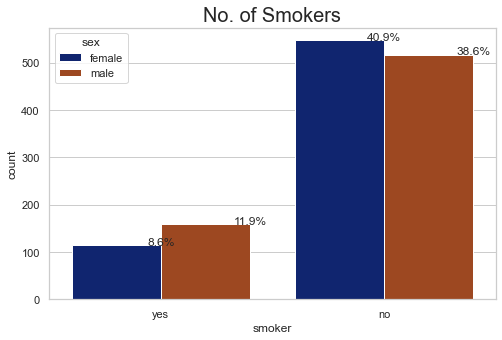

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(raw_data))
ax = sns.countplot(x="smoker", hue="sex", data=raw_data,palette='dark')
plt.title('No. of Smokers', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [14]:
# Adding a column named age_range in this dataset
# pd.cut() function is used to separate the array elements into different bins
age_bins = [18,30,40,50,70]
age = pd.cut(raw_data.age,age_bins,right=False)
age = pd.DataFrame(age,)
age.head()

,age
0,"[18, 30)"
1,"[18, 30)"
2,"[18, 30)"
3,"[30, 40)"
4,"[30, 40)"


In [17]:
age = age.rename(columns={'age':"age_range"})

In [77]:
raw_data = pd.concat([raw_data,age],axis=1)

In [78]:
raw_data.age_range.value_counts()

[18, 30)    417
[50, 70)    385
[40, 50)    279
[30, 40)    257
Name: age_range, dtype: int64

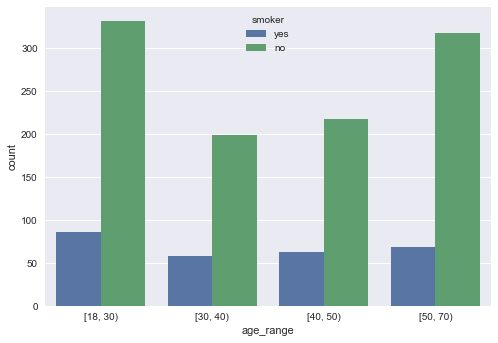

In [79]:
sns.countplot(x="age_range",data=raw_data,hue='smoker')
plt.show()

In [80]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,"[18, 30)"
1,18,male,33.770,1,no,southeast,1725.55230,"[18, 30)"
2,28,male,33.000,3,no,southeast,4449.46200,"[18, 30)"
3,33,male,22.705,0,no,northwest,21984.47061,"[30, 40)"
4,32,male,28.880,0,no,northwest,3866.85520,"[30, 40)"


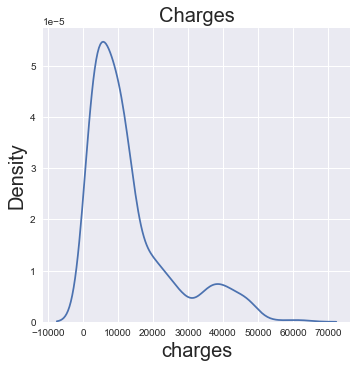

In [56]:
sns.displot(x='charges',data=raw_data,kind='kde')
plt.title('Charges', fontsize=20)

plt.xlabel('charges', fontsize=20)
plt.ylabel('Density', fontsize=20)

plt.show()

c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


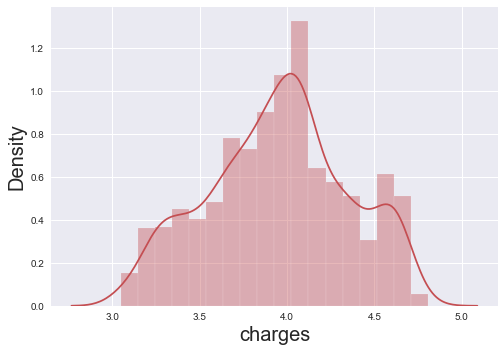

In [59]:
f, ax = plt.subplots(1, 1)
ax = sns.distplot(np.log10(raw_data['charges']), kde = True, color = 'r' )
plt.xlabel('charges', fontsize=20)
plt.ylabel('Density', fontsize=20)

plt.show()

In [83]:
raw_data.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

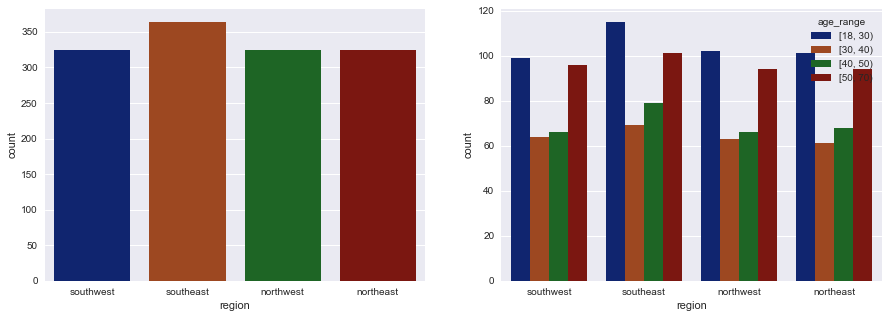

In [84]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x='region',data=raw_data,palette='dark')

plt.subplot(1,2,2)
sns.countplot(x='region',hue='age_range',data=raw_data,palette='dark')
plt.show()

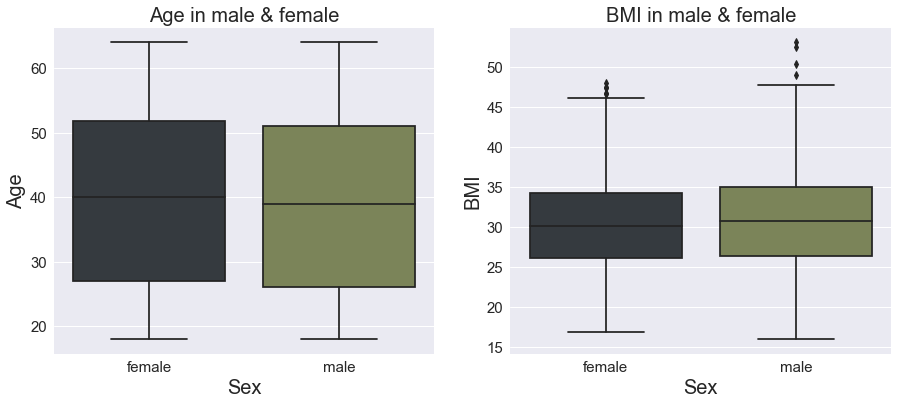

In [39]:
pa_color = ['#343A40','#7F8B52']
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.style.use('seaborn')
sns.boxplot(y=raw_data['age'], x=raw_data['sex'], palette=pa_color)
plt.title('Age in male & female', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Age', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.subplot(1,2,2)
plt.style.use('seaborn')
sns.boxplot(y='bmi',x='sex',data=raw_data,palette=pa_color)
plt.title('BMI in male & female', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.ylabel('BMI', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

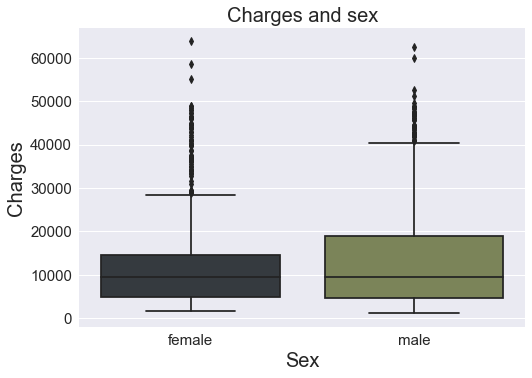

In [45]:
plt.style.use('seaborn')
sns.boxplot(y='charges',x='sex',data=raw_data,palette=pa_color)
plt.title('Charges and sex', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.ylabel('Charges', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


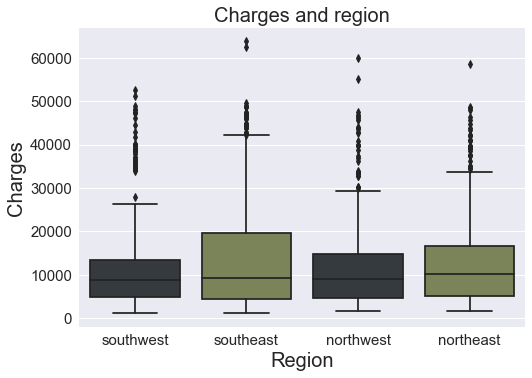

In [49]:
sns.boxplot(x='region',y='charges',data=raw_data,palette=pa_color)
plt.title('Charges and region', fontsize=20)
plt.xlabel('Region', fontsize=20)
plt.ylabel('Charges', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

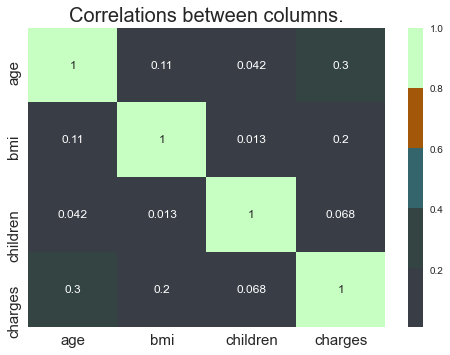

In [61]:
corr = raw_data.corr()
sns.heatmap(corr,annot=True,cmap=['#393E46','#334443','#34656D','#A35709','#C6FFC1'])
plt.title('Correlations between columns.', fontsize=20)


plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

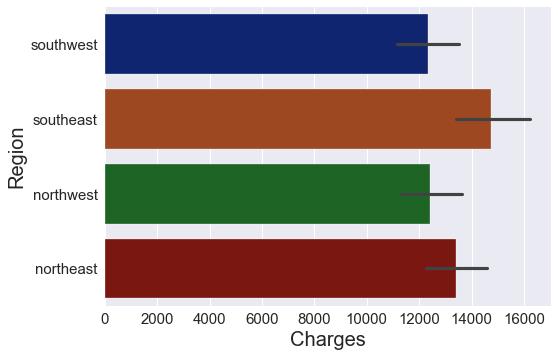

In [62]:
sns.barplot(y='region',x='charges',data=raw_data,palette='dark')
plt.xlabel('Charges', fontsize=20)
plt.ylabel('Region', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [64]:
temp_1 = raw_data.groupby(['region'])[['charges']].sum().reset_index().sort_values(by='charges',ascending=True)
temp_1

,region,charges
3,southwest,4.012755e+06
1,northwest,4.035712e+06
0,northeast,4.343669e+06
2,southeast,5.363690e+06


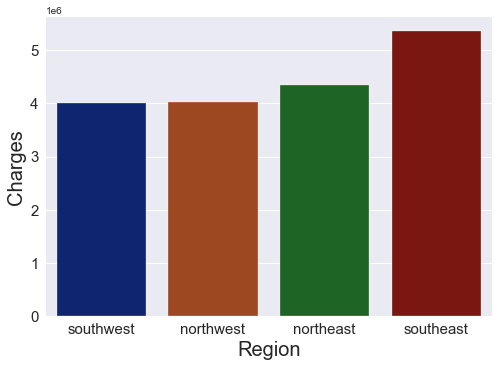

In [65]:
sns.barplot(x='region',y='charges',data=temp_1,palette='dark')
plt.ylabel('Charges', fontsize=20)
plt.xlabel('Region', fontsize=20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [67]:
raw_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


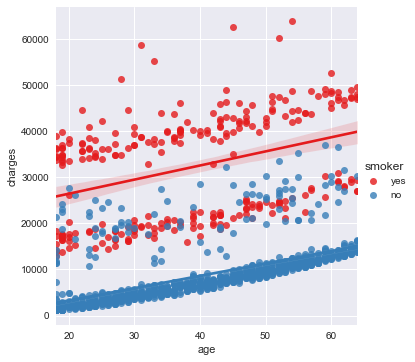

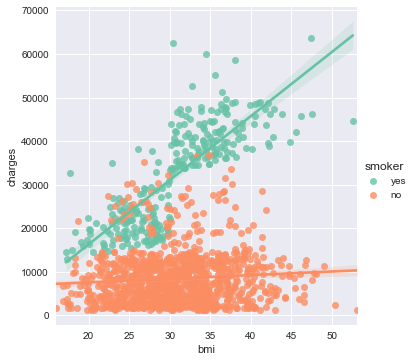

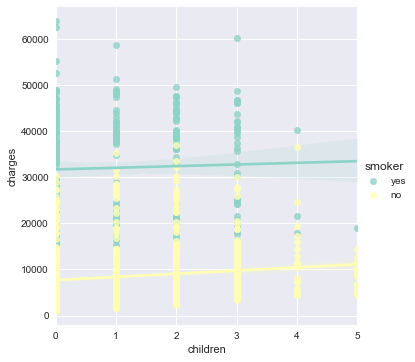

In [69]:
ax = sns.lmplot(x = 'age', y = 'charges', data=raw_data, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=raw_data, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=raw_data, hue='smoker', palette='Set3')

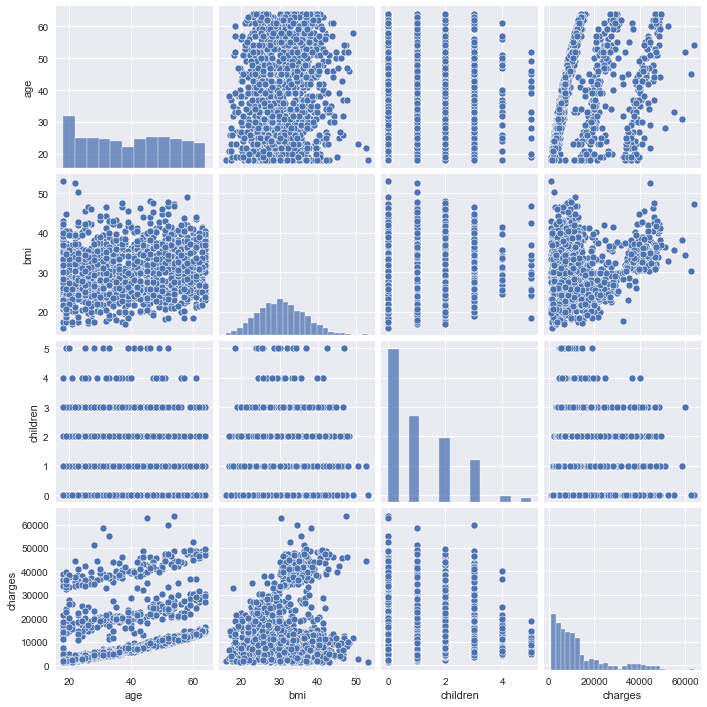

In [70]:
sns.pairplot(raw_data)
plt.show()

In [71]:
# Changing the category column into numerical column
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
raw_data.sex = label.fit_transform(raw_data.sex)
raw_data.smoker = label.fit_transform(raw_data.smoker)
raw_data.region = label.fit_transform(raw_data.region)
raw_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Build OLS model

In [72]:
import statsmodels.api as sm

In [73]:
x = raw_data.drop(['charges'], axis = 1)
y = raw_data['charges']

In [76]:
x = x.drop(columns=['sex'])

In [77]:
X = sm.add_constant(x)

In [78]:
model = sm.OLS(y,X).fit()

In [79]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.2
Date:                Sun, 18 Jul 2021   Prob (F-statistic):               0.00
Time:                        00:30:02   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.187e+04    945.876    -12.546      0.000   -1.37e+04      -1e+04
age          257.4050     11.878     21.670      0.000     234.103     280.707
bmi          332.0420     27.681     11.995      0.000     277.739     386.345
children     478.4405    137.580      3.478      0.001     208.543     748.338
smoker      2.381e+04    410.543     57.992      0.000     2.3e+04    2.46e+04
region      -353.4491    151.878     -2.327      0.020    -651.395     -55.504
==============================================================================
Omnibus:                      299.380   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              715.644
Skew:                           1.208   Prob(JB):                    3.98e-156
Kurtosis:                       5.646   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Build Linear Regression Model

In [80]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.33, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
y_pred = Lin_reg.predict(x_test)

print('Constant is =' ,Lin_reg.intercept_)
print("Intercept of variables are = ",Lin_reg.coef_)
print("Coefficient of determination (r^2) = ",Lin_reg.score(x_test, y_test))

Constant is = -11811.182899607802
Intercept of variables are =  [  258.35999009   322.46400799   555.50883132 23281.14846988
  -261.67304394]
Coefficient of determination (r^2) =  0.7873275952717829


In [82]:
temp_2 = {'True Value': y_test, 'Predicted Value': y_pred}
df = pd.DataFrame(data=temp_2)
df

,True Value,Predicted Value
578,9724.53000,11132.439326
610,8547.69130,9834.667293
569,45702.02235,37801.342197
1034,12950.07120,16063.272079
198,9644.25250,6923.978895
...,...,...
117,19107.77960,28004.212410
520,25656.57526,9929.431863
422,39125.33225,32928.631867
294,3906.12700,4171.359629
